# Grupo 1
Integrantes:
- Franco Cabezas - 201973082-7
- Angelo Miranda - 201973126-2
- Paulina Vega - 201973052-5

# Files

- train_data.csv - data de entrenamiento con 1276 datos
- test_data.csv - data de test con 320 datos
- sample_submission.csv - archivo de muestra de como se debe subir la predicción
- imgs/ - Carpeta con fotos del baño, living, comedor, cocina, piezas de las casas, el número índica el índice de la casa.

# Columns

- id - ID de la propiedad
- date - Fecha
- zipcode - Código Postal
- lat - Latitud
- long - Longitud
- bedrooms - Cantidad de Piezas
- bathrooms - Cantidad de Baños
- sqft_living - área Total de la propiedad
- sqft_lot - Área del Terreno de la propiedad
- floors - Cantidad de Pisos
- waterfront - Vista a alguna fuente de agua (lago, rio, etc.) (0 no tiene, 1 si tiene)
- view - calidad de la vista (0 peor, 4 la mejor)
- condition - Condición de la propiedad (1 la peor, 5 la mejor)
- grade - Construcción, diseño y calidad de la propiedad (1 poca calidad, 13 la mejor calidad y construcción)
- sqft_above - Área del interior de la casa sobre el nivel del suelo
- sqft_basement - Área del Sótano bajo nivel del suelo
- yr_built - Año de construcción
- yr_renovated - Año de renovación
- sqft_living15 - Área promedio de las 15 propiedades vecinas
- sqft_lot15 - Área promedio del terreno de las 15 propiedades vecinas


# Inicio ambiente python

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import xgboost as xgb
# Aquí se escoge el backend de keras
import os
from matplotlib import pyplot
os.environ["KERAS_BACKEND"] = "tensorflow" # 'torch', 'tensorflow', 'jax'

import keras_core as keras

# Estudiando los datos
Antes de probar algoritmos de aprendizaje, se vera como se comportan los datos con los que trabajaremos.

In [57]:
# Cargar el archivo CSV
data = pd.read_csv('train_data.csv')

## Visualización

In [58]:
print("Tamaño del dataset: ", data.shape)
data.head()

Tamaño del dataset:  (1276, 21)


,ID,date,zipcode,lat,long,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,143,20140515T000000,98003,47.2857,-122.300,3.0,2.25,1590.0,7748.0,2.0,...,0.0,4.0,7.0,1590.0,0.0,1991.0,0.0,1590.0,7606.0,263000.0
1,1175,20141203T000000,98117,47.6885,-122.380,3.0,NaN,2040.0,4005.0,NaN,...,0.0,4.0,8.0,1740.0,300.0,1930.0,0.0,1380.0,4005.0,620000.0
2,221,20140711T000000,98106,47.5150,-122.359,2.0,1.00,640.0,7768.0,1.0,...,0.0,3.0,6.0,640.0,0.0,1942.0,0.0,NaN,7424.0,165000.0
3,1231,20141117T000000,98144,47.5758,-122.309,2.0,1.50,1240.0,NaN,NaN,...,0.0,NaN,8.0,1080.0,160.0,NaN,0.0,1530.0,1209.0,403000.0
4,509,20150402T000000,98038,47.3531,-122.017,3.0,NaN,1990.0,NaN,2.0,...,NaN,3.0,7.0,1990.0,0.0,2010.0,0.0,2580.0,3800.0,318200.0


In [59]:
data.describe()

,ID,zipcode,lat,long,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
count,1276.000000,1276.000000,1276.000000,1276.000000,1074.000000,1079.000000,1082.000000,1087.000000,1084.000000,1076.000000,1082.000000,1095.000000,1086.000000,1089.00000,1093.000000,1113.000000,1075.000000,1087.000000,1080.000000,1.276000e+03
mean,783.208464,98076.235110,47.567730,-122.207464,3.388268,2.148054,2140.665434,22913.940202,1.496771,0.011152,0.252311,3.398174,7.695212,1888.30303,279.931382,1971.873315,115.101395,2029.898804,18990.602778,5.610966e+05
std,459.141821,54.734005,0.137067,0.147224,0.937513,0.853977,977.118984,52877.670777,0.534790,0.105063,0.811640,0.654332,1.283757,919.42862,447.916340,28.587697,465.487096,760.953817,39235.248485,3.668160e+05
min,1.000000,98001.000000,47.162200,-122.511000,1.000000,0.000000,540.000000,638.000000,1.000000,0.000000,0.000000,1.000000,5.000000,530.00000,0.000000,1900.000000,0.000000,700.000000,1082.000000,7.800000e+04
25%,384.750000,98029.000000,47.492000,-122.339000,3.000000,1.500000,1420.000000,5383.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1220.00000,0.000000,1953.000000,0.000000,1470.000000,5488.000000,3.262345e+05
50%,778.500000,98059.000000,47.588200,-122.215000,3.000000,2.250000,1990.000000,8145.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1590.00000,0.000000,1971.000000,0.000000,1880.000000,8039.500000,4.675000e+05
75%,1182.250000,98117.000000,47.681300,-122.109750,4.000000,2.500000,2620.000000,14578.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2400.00000,550.000000,1998.000000,0.000000,2440.000000,12263.000000,6.766250e+05
max,1592.000000,98199.000000,47.777500,-121.402000,10.000000,7.500000,7000.000000,715690.000000,3.000000,1.000000,4.000000,5.000000,12.000000,6370.00000,3500.000000,2015.000000,2015.000000,5790.000000,339332.000000,3.204000e+06


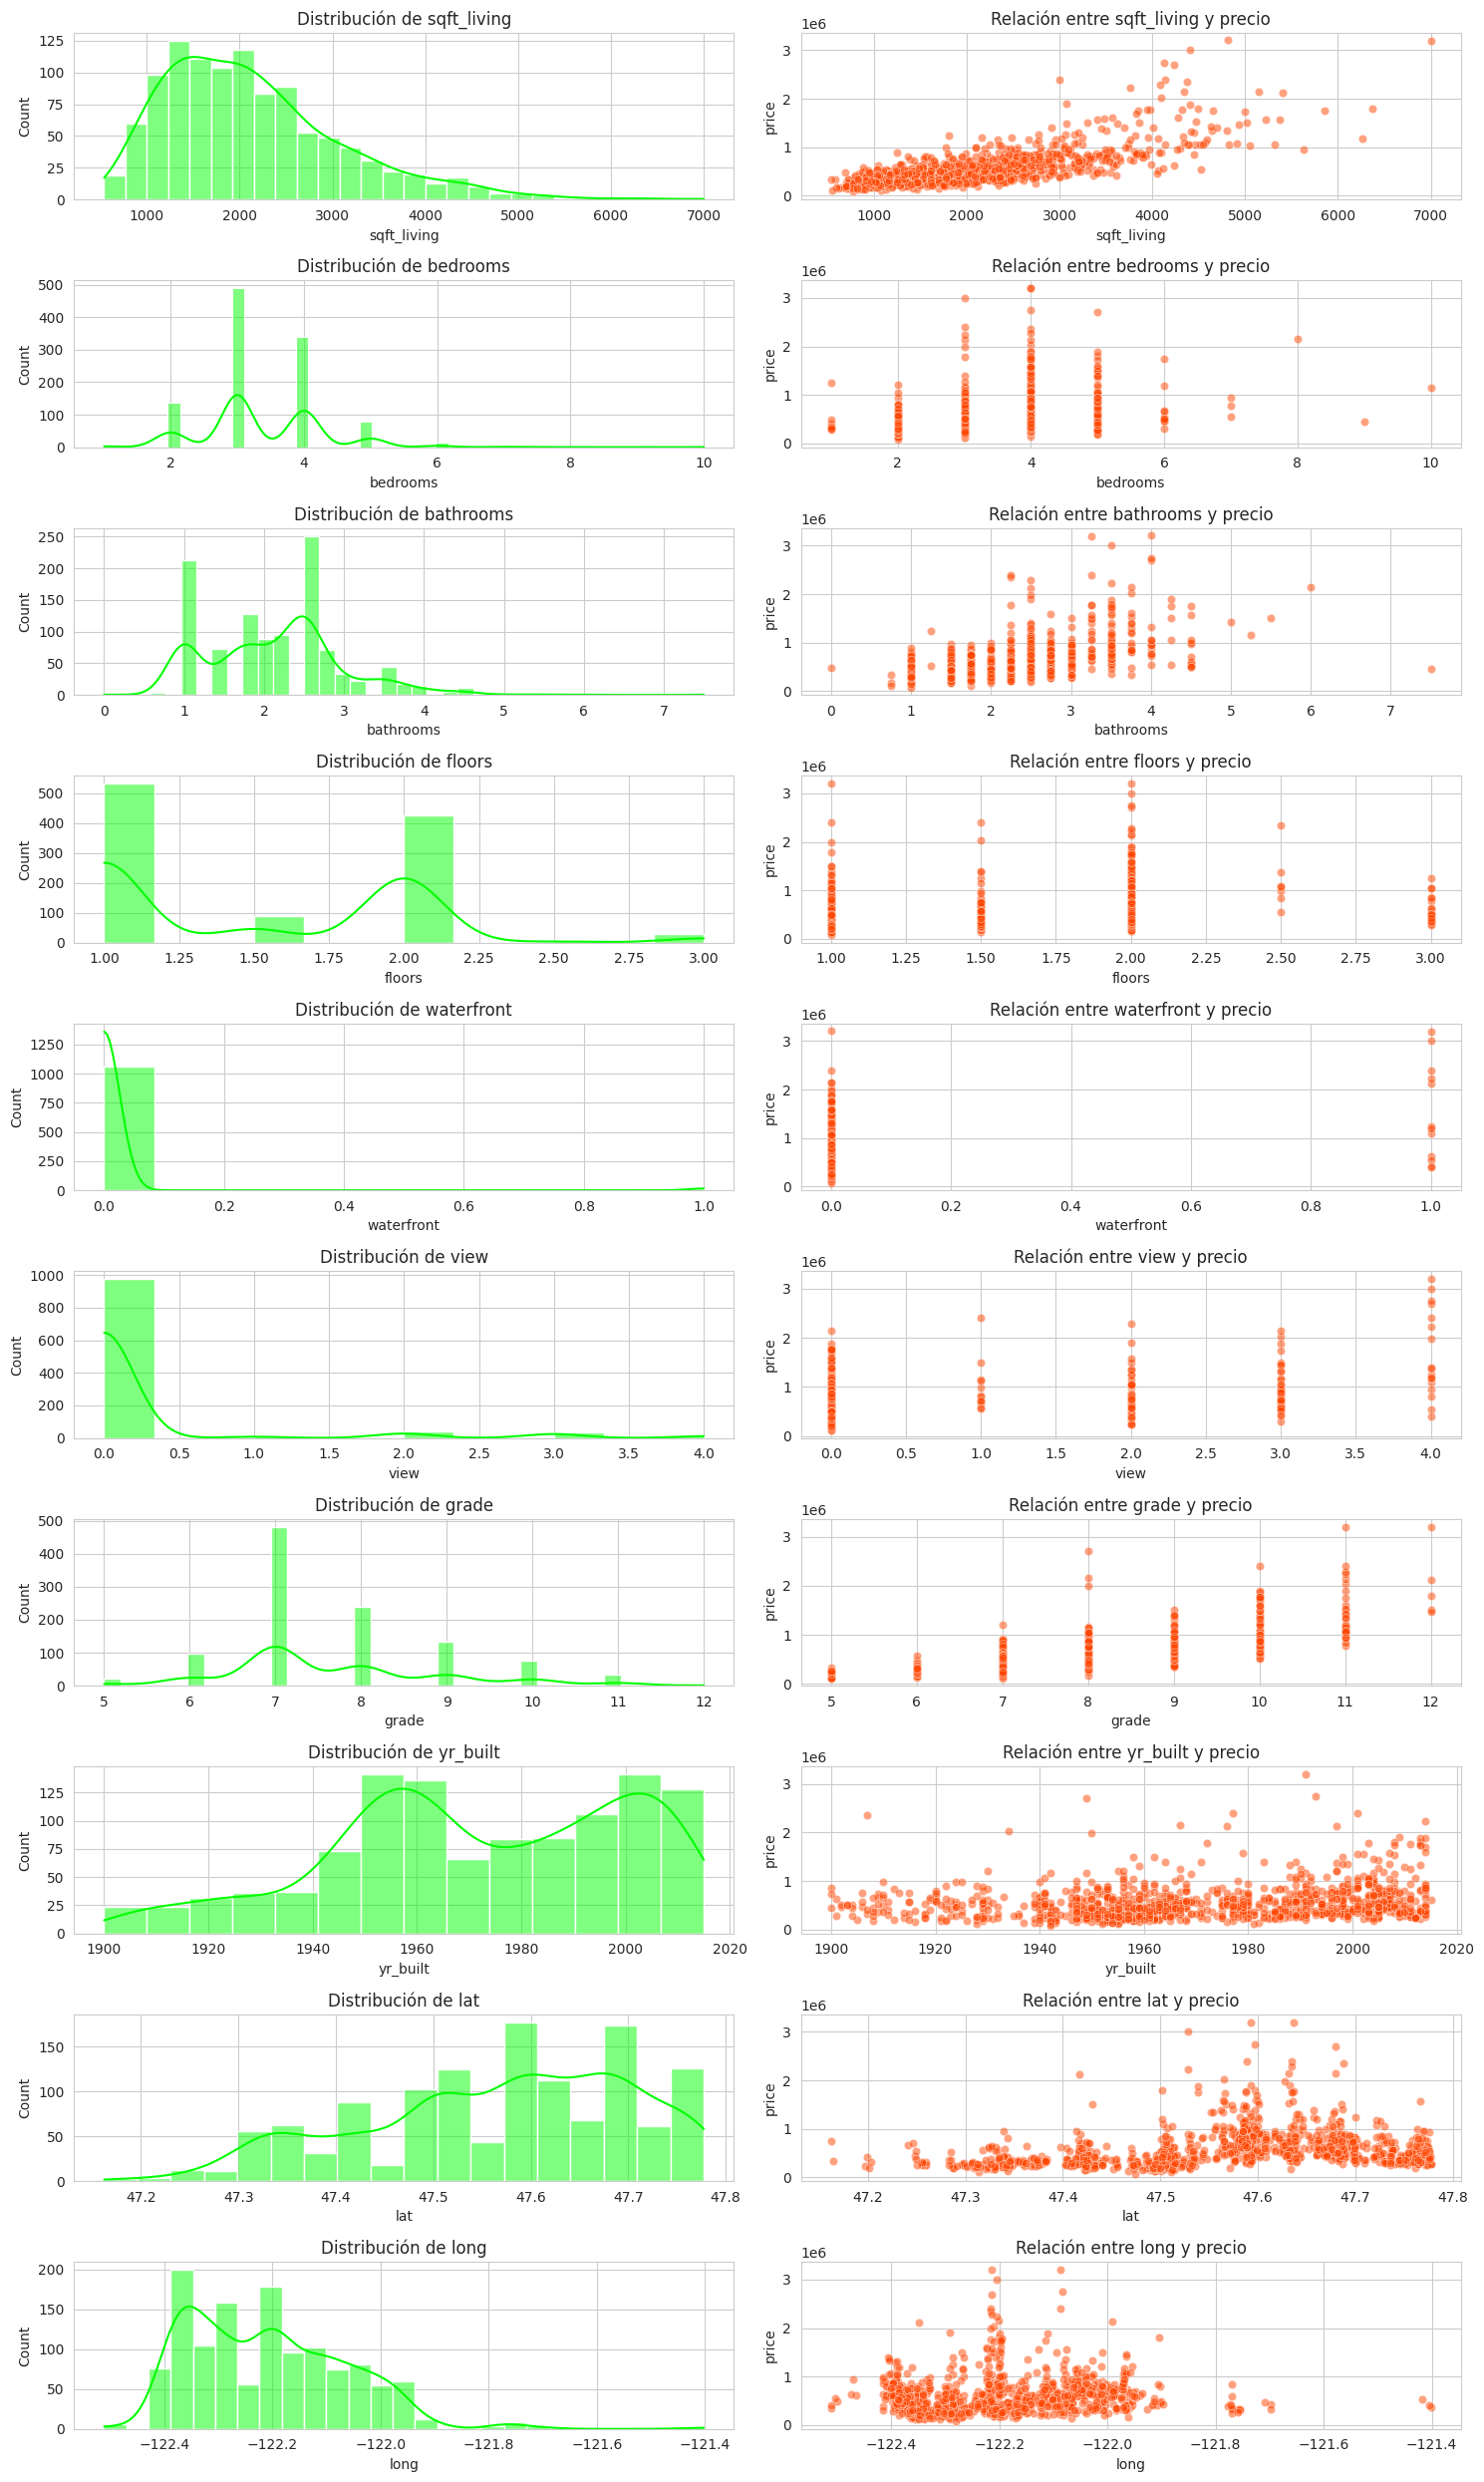

In [60]:
sns.set_style("whitegrid")

# Lista de características influyentes para visualizar
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade', 'yr_built', 'lat', 'long']

fig, axes = plt.subplots(nrows=len(features), ncols=2, figsize=(15, 25))

# Crear gráficos para cada característica
for i, feature in enumerate(features):
    sns.histplot(data[feature], ax=axes[i, 0], kde=True, color='lime')
    axes[i, 0].set_title(f'Distribución de {feature}')
    
    sns.scatterplot(x=data[feature], y=data['price'], ax=axes[i, 1], alpha=0.5, color='orangered')
    axes[i, 1].set_title(f'Relación entre {feature} y precio')

plt.tight_layout()
plt.show()

Se ve una clara relación entre los atributos *sqft_living*, *bathrooms* y *grade* con *price*.

A continuación, se grafica un gráfico de dispersión para cada par de características, para ver si hay relaciones entre ellas y para saber cómo se comportan los datos. Además en la diagonal se incluye un histograma de los valores para esa característica.

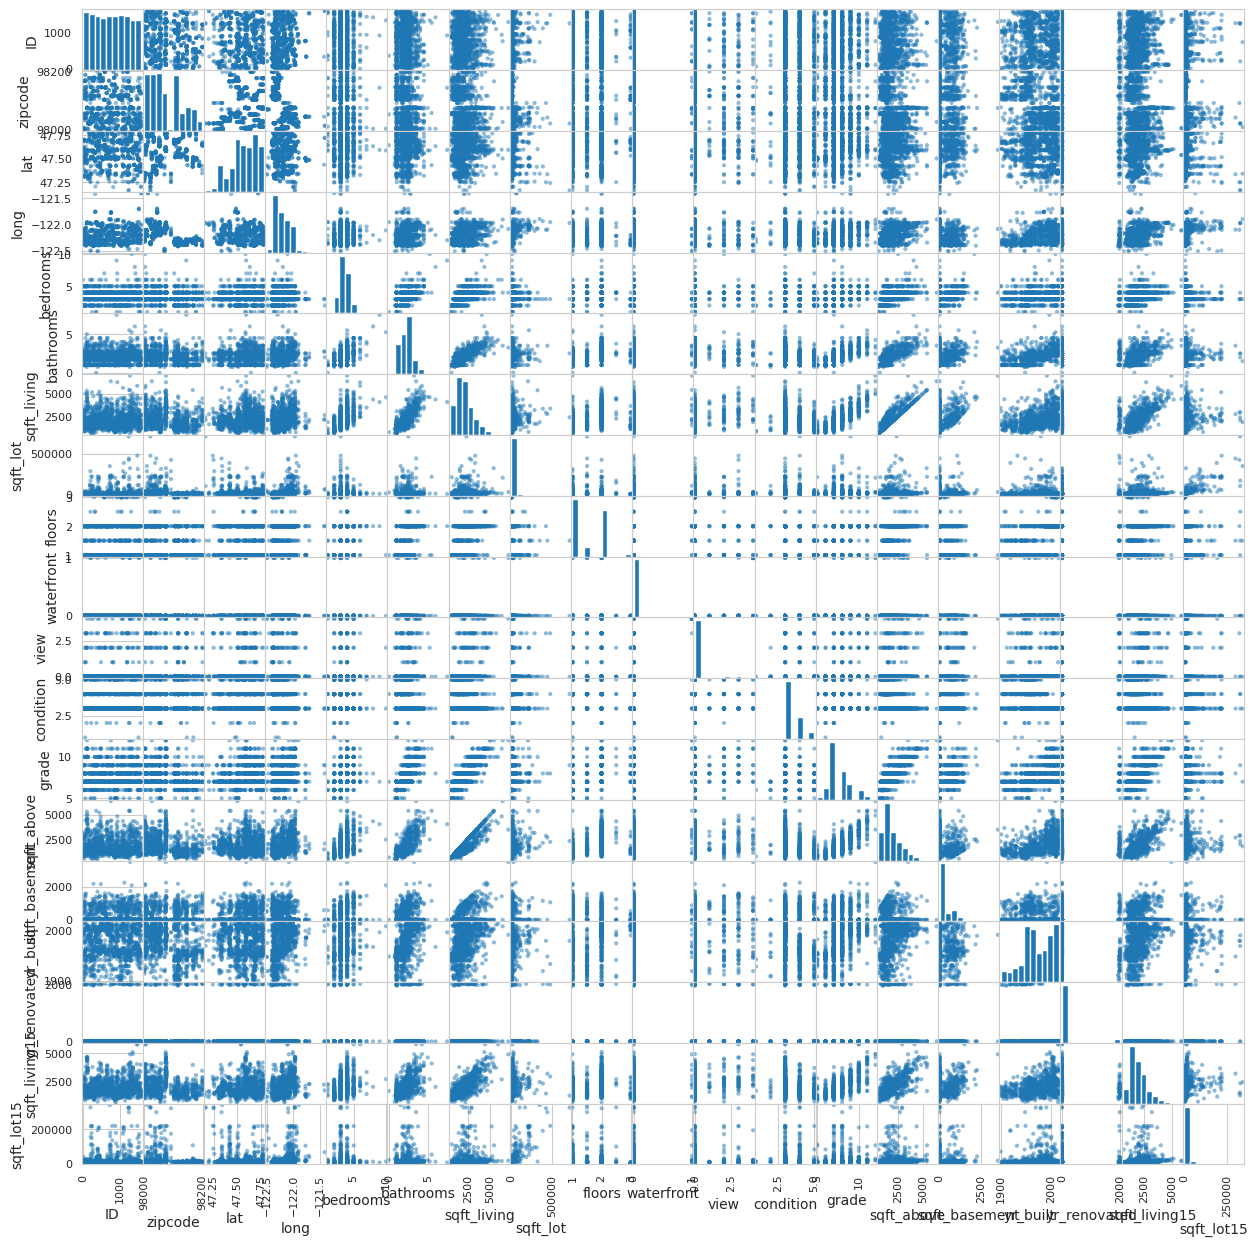

In [61]:
pd.plotting.scatter_matrix(data.drop("price", axis=1, inplace=False), figsize=(15, 15))
pyplot.show()

Se pueden observar algunas relaciones, en su mayoria los atributos relaciondos con los metros cuadrados (*sqft*).

Analicemos los outliers.

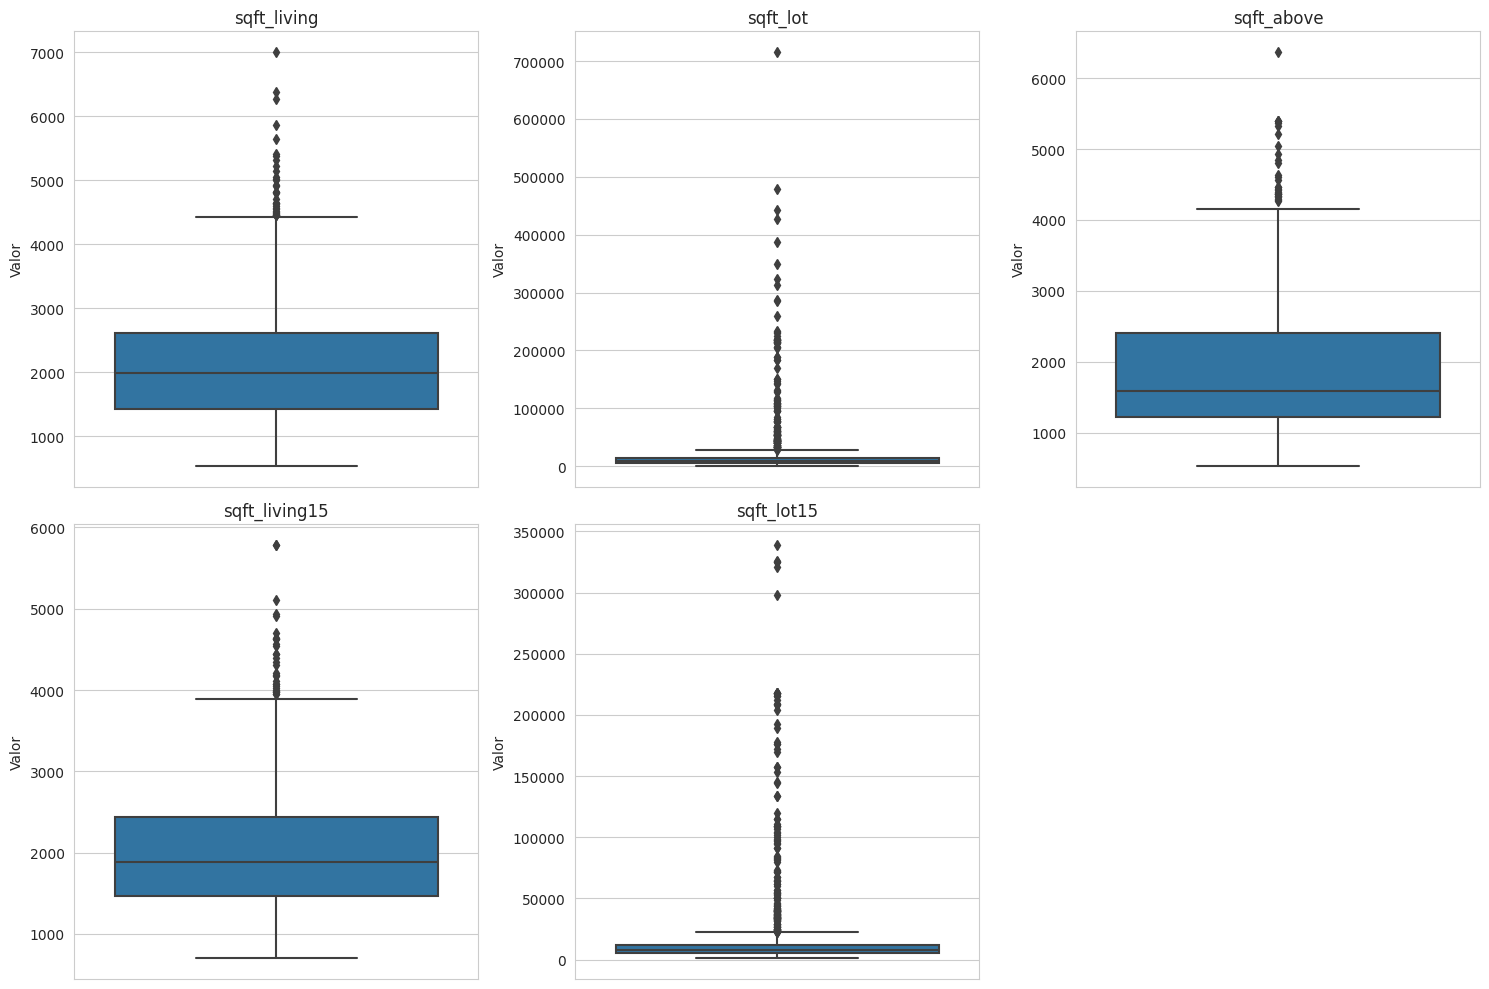

In [62]:
features_to_plot = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, y=feature)
    plt.title(feature)
    plt.ylabel('Valor')

plt.tight_layout()
plt.show()

Se observan muchisimos outliers tanto en *sqft_lot15* y *sqft_lot*.

# Definición de atributos

In [63]:
# Columnas categóricas o discretas
for column in ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

# Columnas numéricas continuas
median_value = [] # Se guarda median_value para usarlo en el test set
for idx, column in enumerate(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated']):
    median_value.append(data[column].median())
    data[column].fillna(median_value[idx], inplace=True)

# Feature-engenniering
Se hicieron diversas conversiones de los datos para que aportaran un mayor valor en el entrenamiento de la red.

- zipcode: Se separaron sus digitos en:
  - state_code: El codigo del estado, en los dataset de test y train solo es 9 (Washington) por lo que se eliminara.
  - city_code: Representa a que ciudad pertenece la propiedad, en el train y test set solo existen 2 categorias 80 y 81.
  - delivery_area: Representa las zonas de reparto de correo, se evaluo que reducia la generalización del modelo.
- Latitud y longitud: a coordenadas polares, para un mejor manejo.
- yr_built: Se convirtio en "property_age" que representa la diferencia entre el año actual y el año de construcción de la propiedad. Entrega más valor.
- yr_renovated: Se convirtio en "is_renovated" que representa si una propiedad se renovo o no.
- Las fechas se pasaron a encoding ciclico.

In [64]:
# zipcode
data['state_code'] = data['zipcode'].apply(lambda x: int(str(x)[0]))
data['city_code'] = data['zipcode'].apply(lambda x: int(str(x)[1:3]))
data['delivery_area_code'] = data['zipcode'].apply(lambda x: int(str(x)[3:]))

# latitud y longitud en coordenadas polares
data['r'] = np.sqrt(data['lat']**2 + data['long']**2)
data['theta'] = np.arctan2(data['lat'], data['long'])

# Edad de la propiedad y si ha sido renovada
data['property_age'] = 2023 - data['yr_built']
data['is_renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Ingeniería de características: Encoding cíclico para fecha
data['month'] = pd.to_datetime(data['date']).dt.month
data['day'] = pd.to_datetime(data['date']).dt.day
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)
data['day_sin'] = np.sin(2 * np.pi * data['day'] / 30)
data['day_cos'] = np.cos(2 * np.pi * data['day'] / 30)

# Eliminar columnas no necesarias
data = data.drop(columns=['ID', 'date', 'zipcode', 'lat', 'long', 'yr_built', 'yr_renovated', 'month', 'day'])
data_without_delivery = data.drop(columns=['state_code','delivery_area_code'])

# Interacciones entre atributos
Al generar interacciones entre atributos podemos generar nuevos campos utiles para poder entrenar la red.

In [65]:
data_interactions = data_without_delivery.copy()
data_interactions['sqft_living_grade'] = data_interactions['sqft_living'] * data_interactions['grade']
data_interactions['view_waterfront'] = data_interactions['view'] * data_interactions['waterfront']
data_interactions['bathrooms_bedrooms'] = data_interactions['bathrooms'] * data_interactions['bedrooms']
data_interactions['sqft_living_lot'] = data_interactions['sqft_living'] * data_interactions['sqft_lot']
data_interactions['floors_sqft_living'] = data_interactions['floors'] * data_interactions['sqft_living']

# Interacciones basadas en el dominio de los atributos

In [66]:
data_domain_features = data_interactions.copy()
data_domain_features['bathroom_per_bedroom'] = data_domain_features['bathrooms'] / (data_domain_features['bedrooms'] + 1)  # Evitar división por cero
data_domain_features['sqft_per_floor'] = data_domain_features['sqft_living'] / (data_domain_features['floors'] + 1)  # Evitar división por cero

#new_houses = data_domain_features["property_age"].quantile(0.25)
#data_domain_features['is_new'] = (data_domain_features['property_age'] <= new_houses).astype(int)

# Características para considerar la transformación logarítmica
log_transform_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']
# Aplicar la transformación logarítmica log(x + 1) para manejar los ceros y podamos interpretar mejor los parámetros del modelo.
for feature in log_transform_features:
    data_domain_features[feature] = np.log1p(data_domain_features[feature])

# Cambiar outliers
Esto permite una mejor presición entrenamiento, se usara la mediana como un estadistico más estable.

In [67]:
data_iqr = data_domain_features.copy()

features_to_plot = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']
# Guardar Q1 y Q3 para usarlos en el test set
Q1 = []
Q3 = []
for idx,feature in enumerate(features_to_plot):
    Q1.append(data_iqr[feature].quantile(0.25))
    Q3.append(data_iqr[feature].quantile(0.75))
    IQR = Q3[idx] - Q1[idx]
    lower_bound = Q1[idx] - 1.5 * IQR
    upper_bound = Q3[idx] + 1.5 * IQR
    data_iqr[feature][(data_iqr[feature] < lower_bound) | (data_iqr[feature] > upper_bound)] = np.nan
    # Imputar los valores NaN con la mediana
    median_value_iqr = data_iqr[feature].median()
    data_iqr[feature].fillna(median_value_iqr, inplace=True)

/tmp/ipykernel_34056/3244273885.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iqr[feature][(data_iqr[feature] < lower_bound) | (data_iqr[feature] > upper_bound)] = np.nan
/tmp/ipykernel_34056/3244273885.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iqr[feature][(data_iqr[feature] < lower_bound) | (data_iqr[feature] > upper_bound)] = np.nan
/tmp/ipykernel_34056/3244273885.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

# Entrenamiento

## Dividir en train, test set y validation set

In [68]:
y = data_iqr['price']
X = data_iqr.drop(columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)
X_final = scaler.transform(X)

## Validación cruzada 
Se realiza entre varios modelos para seleccionar el que mejor se adapte al problema

In [69]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42))
]

for name, model in models:
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    mse = np.mean(-cv_results)
    print(f"{name}: {mse:.2f}")

Linear Regression: 39783129752.92
Decision Tree: 62594049379.40
Random Forest: 35605509334.66
Gradient Boosting: 31988531733.98


## Entrenamiento del modelo que resulto mejor
En este caso el que mejor se evaluo fue el Gradient Boosting.

In [70]:
param_grid = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 4, 5]
}

gb_model = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Mejores parámetros y MSE asociado
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_

print(f"Mejores Parámetros: {best_params}")
print(f"Error Cuadrático Medio asociado: {best_mse:.2f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores Parámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Error Cuadrático Medio asociado: 31057328590.56


In [71]:
# Predecir conjunto de test y calcular MSE
y_predict = grid_search.predict(X_test_scaled)
print(mean_squared_error(y_predict, y_test))

33532418825.783287


### Visualización del modelo Gradient Boosting post-entrenamiento

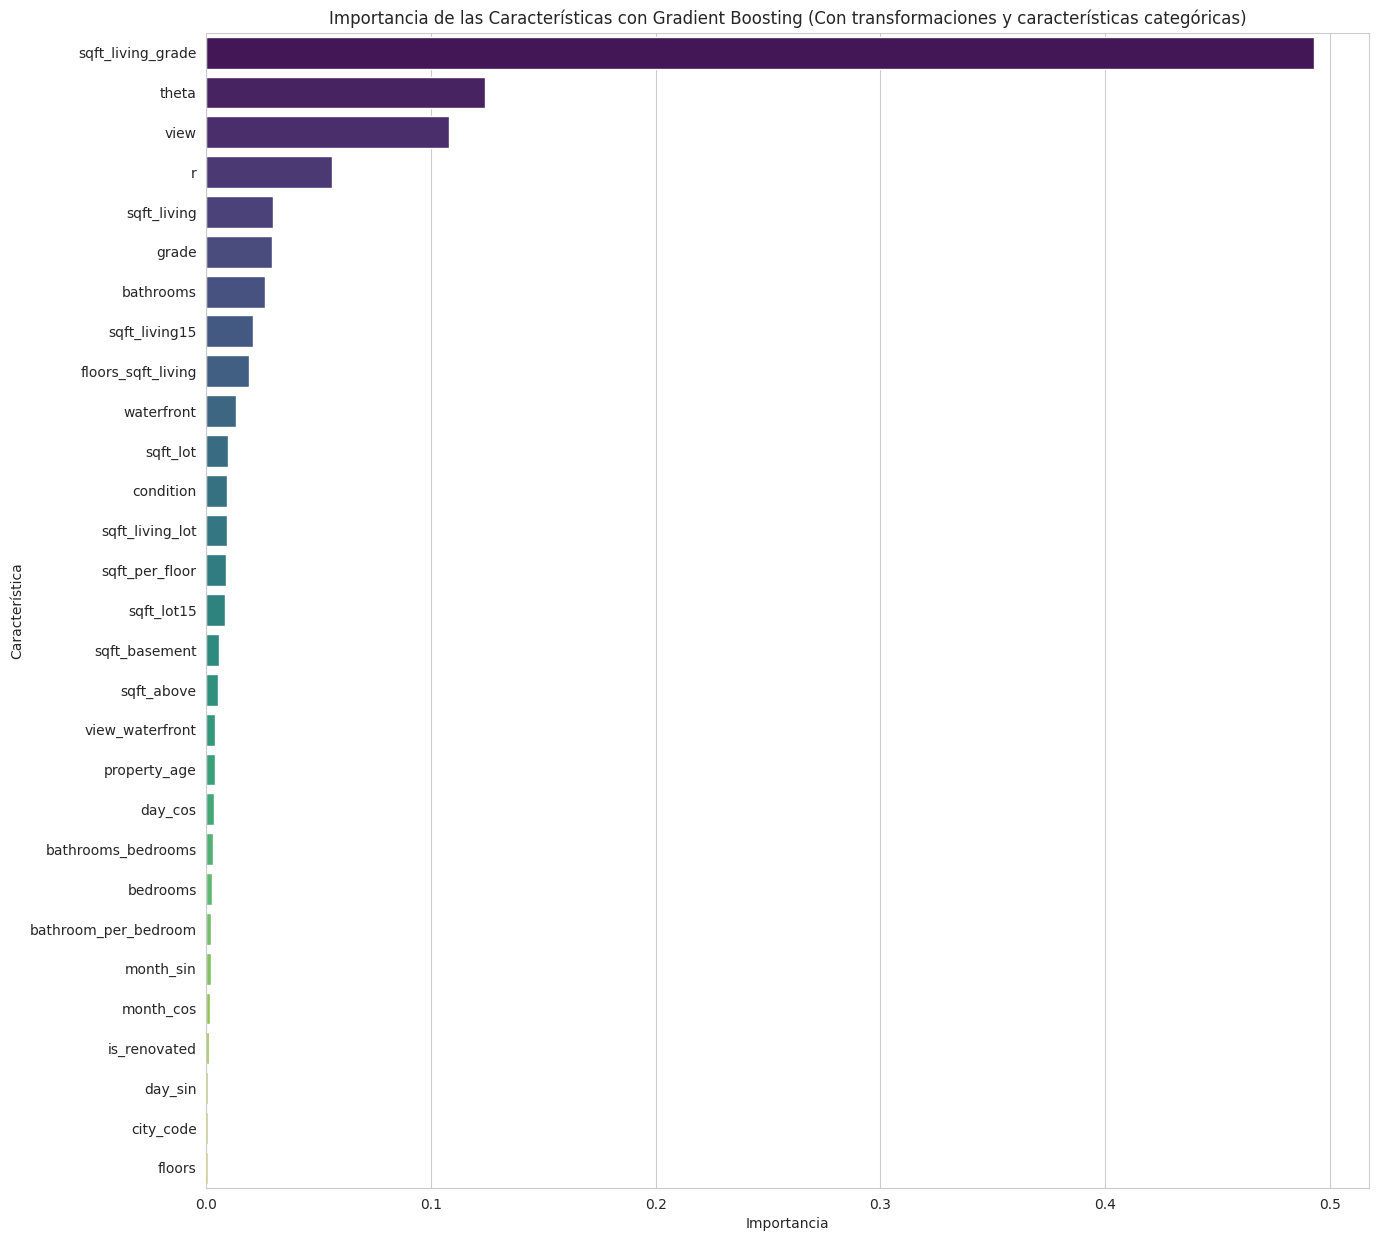

In [72]:
feature_importances_domain_transformed = grid_search.best_estimator_.feature_importances_
features_list_domain_transformed = X_train.columns

importance_df_domain_transformed = pd.DataFrame({
    'Feature': features_list_domain_transformed,
    'Importance': feature_importances_domain_transformed
})

# Ordenar el DataFrame por importancia
importance_df_domain_transformed = importance_df_domain_transformed.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, 15))
sns.barplot(data=importance_df_domain_transformed, x='Importance', y='Feature', palette='viridis')
plt.title('Importancia de las Características con Gradient Boosting (Con transformaciones y características categóricas)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

## Implementación de XGBoost
Versión optimizada de Gradient Boosting.

In [73]:
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

param_grid_xgb = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 4, 5],
    "subsample": [0.8, 0.9, 1],
    "colsample_bytree": [0.8, 0.9, 1]
}

grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_xgb.fit(X_final, y)

# Resultados
best_params_xgb = grid_search_xgb.best_params_
best_mse_xgb = -grid_search_xgb.best_score_

print(f"Mejores Parámetros para XGBoost: {best_params_xgb}")
print(f"Error Cuadrático Medio asociado: {best_mse_xgb:.2f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Mejores Parámetros para XGBoost: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.8}
Error Cuadrático Medio asociado: 26987948722.14


In [74]:
# Predecir conjunto de test y calcular
y_predict = grid_search_xgb.predict(X_test_scaled)
print(mean_squared_error(y_predict, y_test))

2453743293.360279


### Visualización del modelo XGradient Boosting post-entrenamiento

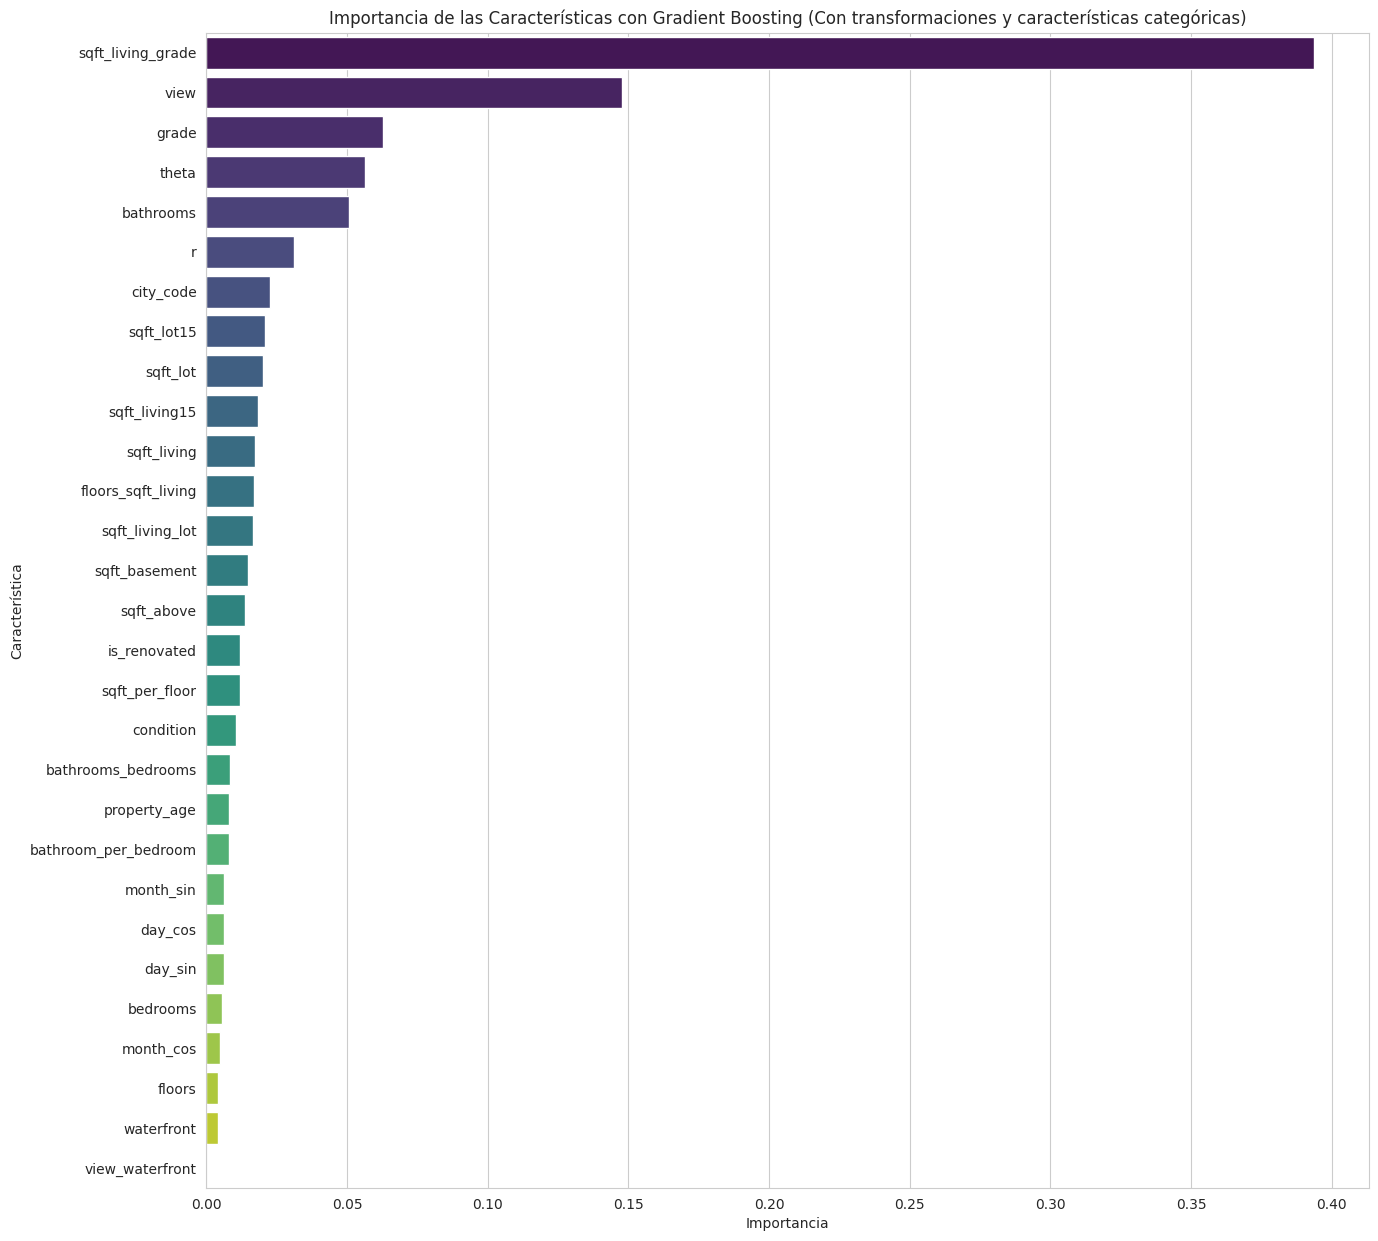

In [75]:
feature_importances_domain_transformed = grid_search_xgb.best_estimator_.feature_importances_
features_list_domain_transformed = X_train.columns

importance_df_domain_transformed = pd.DataFrame({
    'Feature': features_list_domain_transformed,
    'Importance': feature_importances_domain_transformed
})

# Ordenar el DataFrame por importancia
importance_df_domain_transformed = importance_df_domain_transformed.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, 15))
sns.barplot(data=importance_df_domain_transformed, x='Importance', y='Feature', palette='viridis')
plt.title('Importancia de las Características con Gradient Boosting (Con transformaciones y características categóricas)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

# Predecir

In [76]:
test_data = pd.read_csv('test_data.csv')
df_id = test_data['ID'].copy()

# Definición de atributos
for column in ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']:
    mode_value = data[column].mode()[0]
    test_data[column].fillna(mode_value, inplace=True)

for idx, column in enumerate(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated']):
    test_data[column].fillna(median_value[idx], inplace=True)

# Feature-engenniering
#  zipcode
test_data['state_code'] = test_data['zipcode'].apply(lambda x: int(str(x)[0]))
test_data['city_code'] = test_data['zipcode'].apply(lambda x: int(str(x)[1:3]))
test_data['delivery_area_code'] = test_data['zipcode'].apply(lambda x: int(str(x)[3:]))

# latitud y longitud en coordenadas polares
test_data['r'] = np.sqrt(test_data['lat']**2 + test_data['long']**2)
test_data['theta'] = np.arctan2(test_data['lat'], test_data['long'])

# Edad de la propiedad y si ha sido renovada
test_data['property_age'] = 2023 - test_data['yr_built']
test_data['is_renovated'] = test_data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Encoding cíclico para fecha
test_data['month'] = pd.to_datetime(test_data['date']).dt.month
test_data['day'] = pd.to_datetime(test_data['date']).dt.day
test_data['month_sin'] = np.sin(2 * np.pi * test_data['month'] / 12)
test_data['month_cos'] = np.cos(2 * np.pi * test_data['month'] / 12)
test_data['day_sin'] = np.sin(2 * np.pi * test_data['day'] / 30)
test_data['day_cos'] = np.cos(2 * np.pi * test_data['day'] / 30)

# Eliminar columnas no necesarias
test_data = test_data.drop(columns=['ID', 'date', 'zipcode', 'lat', 'long', 'yr_built', 'yr_renovated', 'month', 'day'])
test_data_without_delivery = test_data.drop(columns=['state_code','delivery_area_code'])

# Interacciones entre características
test_data_interactions = test_data_without_delivery.copy()
test_data_interactions['sqft_living_grade'] = test_data_interactions['sqft_living'] * test_data_interactions['grade']
test_data_interactions['view_waterfront'] = test_data_interactions['view'] * test_data_interactions['waterfront']
test_data_interactions['bathrooms_bedrooms'] = test_data_interactions['bathrooms'] * test_data_interactions['bedrooms']
test_data_interactions['sqft_living_lot'] = test_data_interactions['sqft_living'] * test_data_interactions['sqft_lot']
test_data_interactions['floors_sqft_living'] = test_data_interactions['floors'] * test_data_interactions['sqft_living']

# Características basadas en el dominio
test_data_domain_features = test_data_interactions.copy()
test_data_domain_features['bathroom_per_bedroom'] = test_data_domain_features['bathrooms'] / (test_data_domain_features['bedrooms'] + 1)  # Evitar división por cero
test_data_domain_features['sqft_per_floor'] = test_data_domain_features['sqft_living'] / (test_data_domain_features['floors'] + 1)  # Evitar división por cero
#test_data_domain_features['is_new'] = (test_data_domain_features['property_age'] <= new_houses).astype(int)

# Características para considerar la transformación logarítmica
log_transform_features = ['sqft_living', 'sqft_lot','sqft_above', 'sqft_living15', 'sqft_lot15']
# Aplicar la transformación logarítmica (log(x + 1) para manejar los ceros)
for feature in log_transform_features:
    test_data_domain_features[feature] = np.log1p(test_data_domain_features[feature])
    
test_data_iqr = test_data_domain_features.copy()

#features_to_plot = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']
#for idx, feature in enumerate(features_to_plot):
#    IQR = Q3[idx] - Q1[idx]
#    lower_bound = Q1[idx] - 1.5 * IQR
#    upper_bound = Q3[idx] + 1.5 * IQR
#    data_iqr[feature][(test_data_iqr[feature] < lower_bound) | (test_data_iqr[feature] > upper_bound)] = np.nan

    # Imputar los valores NaN con la mediana
#    median_value = data_iqr[feature].median()
#    test_data_iqr[feature].fillna(median_value, inplace=True)
test_data_scaled = scaler.transform(test_data_iqr)
results = grid_search_xgb.predict(test_data_scaled)
results_df = pd.DataFrame(results, columns=['price'])
df_submission = pd.concat([df_id, results_df], axis=1)
df_submission.to_csv('submission.csv', index=False)


In [77]:
df_submission

,ID,price
0,1473,1.787664e+06
1,716,3.031988e+05
2,1360,8.465317e+05
3,1522,7.013310e+05
4,1570,1.695562e+05
...,...,...
315,1475,4.829071e+05
316,374,9.305489e+05
317,795,6.771883e+05
318,888,2.303432e+05


# Modelo extra
Presento mucho MSE

In [78]:
#Early Stopping
my_callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=0,
        patience=10,
        restore_best_weights=True #Es importante retornar los mejores pesos, por defecto viene en False asi que siempre asegurarse de ponerlo en True
    )
]
epochs = 20
batch_size = 128

## Modelo DNN

In [79]:
inputs = keras.layers.Input(shape=(X_train_scaled.shape[1],))
x = keras.layers.Dense(64, activation="relu", kernel_initializer="he_normal")(inputs)
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(16, activation='relu', kernel_initializer="he_normal")(x)
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(4, activation='relu', kernel_initializer="he_normal")(x)
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(1)(x)
model = keras.Model(inputs=inputs, outputs=output)
loss_dnn = keras.losses.MeanSquaredError()
opt_dnn= keras.optimizers.AdamW(learning_rate=1e-3)
model.compile(optimizer=opt_dnn, loss=loss_dnn, metrics=["mean_squared_error", "root_mean_squared_error"])
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=epochs, batch_size=batch_size)

y_pred = model.predict(X_val_scaled)
mse = mean_squared_error(y_pred, y_val)
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 508ms/step - loss: 423719651100.4445 - mean_squared_error: 423727089436.4445 - root_mean_squared_error: 650920.2500 - val_loss: 596895858688.0000 - val_mean_squared_error: 596895858688.0000 - val_root_mean_squared_error: 772590.3750
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 400593864476.4445 - mean_squared_error: 400537805710.2222 - root_mean_squared_error: 632275.2986 - val_loss: 596895596544.0000 - val_mean_squared_error: 596895596544.0000 - val_root_mean_squared_error: 772590.1875
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 433021281166.2222 - mean_squared_error: 433054562531.5555 - root_mean_squared_error: 658043.0903 - val_loss: 596895334400.0000 - val_mean_squared_error: 596895334400.0000 - val_root_mean_squared_error: 772590.0000
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 451361410616.8889 - mean_squared_error: 451402090268.4445 - root_mean_squared_error: 671709.9097 - val_loss: 596895072256.0000 -

In [80]:
results = model.predict(test_data_scaled)
results_df = pd.DataFrame(results, columns=['price'])
df_submission = pd.concat([df_id, results_df], axis=1)
df_submission.to_csv('submission.csv', index=False)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


# Por probar
- Otras configuraciones de redes
- Hiperparametros
- Otros estadisticos para llenar datos vacios